In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

In [2]:
import pandas as pd


In [4]:
df = pd.read_excel('chunk_1.xlsx')
df_cleaned = df.dropna(subset=['insta_type'])


/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [30]:
df_cleaned.head()

,Column_0,حوزه پیج,insta_type
0,peyman.yaghoubi,آموزشی,آموزش اینستاگرام
1,vakilshim.academy,آموزشی,حقوق
2,mashahbazi_official,آموزشی,آموزش اینستاگرام
3,directam.ir,خدماتی,آموزش اینستاگرام
5,pooriasoluti,آموزشی,آموزش اینستاگرام


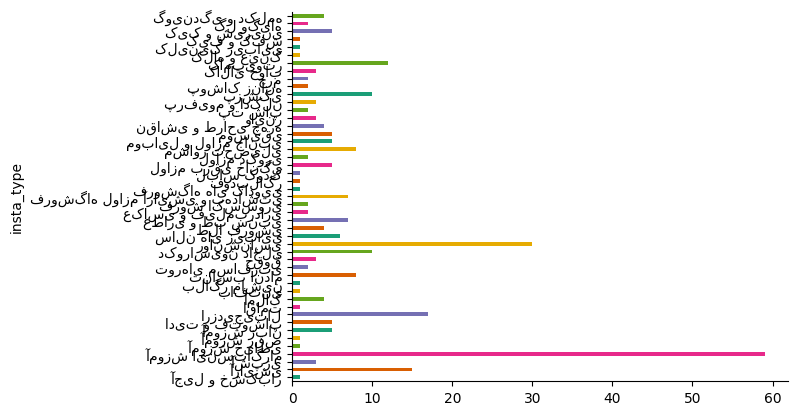

In [33]:
# @title حوزه پیج

from matplotlib import pyplot as plt
import seaborn as sns
df_cleaned.groupby('insta_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [5]:
# prompt: keep the insta_type collumn and then save them in a list

insta_types = df_cleaned['insta_type'].tolist()
print(insta_types)


['آموزش اینستاگرام', 'حقوق', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'املاک', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'پزشکی', 'آموزش زبان', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'دکوراسیون داخلی', 'نقاشی و طراحی چهره', 'آموزش رقص', 'آرایشی', 'آرایشی', 'کامپیوتر', 'ارزدیجیتال', 'پرفیوم و ادکلن', 'لوازم دکوری', 'آموزش اینستاگرام', 'روانشناسی', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'آموزش اینستاگرام', 'لوازم برقی خانگی', 'روانشناسی', 'کالای خواب', 'کیف و کفش', 'تناسب اندام', 'دکوراسیون داخلی', 'ارزدیجیتال', 'روانشناسی', 'روانشناسی', 'کامپیوتر', 'لوازم برقی خانگی', 'عطاری و طب سنتی', 'روانشناسی', 'آموزش اینستاگرام', 'لوازم دکوری', 'آموزش اینستاگرام', 'پرفیوم و ادکلن', 'ارزدیجیتال', 'گویندگی و دکلمه', 'پزشکی', 'آموزش اینستاگرام', 'روانشناسی', 'آموزش اینستاگرام', 'روانشناسی', 'ادیت و فتوشاپ', 'طلا فروشی', 'آموزش اینستاگرام', 'آرایشی', 'گویندگی و دکلمه', 'آشپزی', 'فروشگاه لوازم آرایشی و به

In [7]:
!pip install openai==0.28

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 1.8 MB/s eta 0:00:00


In [115]:
input_list = ["""| معین صادقیان | آموزش رایگان ارز دیجیتال | اقتصاد و بازارهای مالی
📈 کارشناس اقتصاد و تحلیل گر بازارهای مالی
💰 اینجا اقتصاد و ترید رو به زبان ساده یاد بگیر
"""]

In [116]:
import re
def remove_emojis_and_clean_text(input_list):
    # Remove emojis
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  # other symbols
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)

    cleaned_list = []

    for text in input_list:
        # Remove emojis from each text block
        text = emoji_pattern.sub(r'', text)

        # Remove unwanted characters and preserve spaces and Persian characters
        text = re.sub(r'[^\w\sآ-ی]', ' ', text)

        # Remove extra spaces
        text = re.sub(r'\s+', ' ', text).strip()

        cleaned_list.append(text)

    return cleaned_list


In [117]:
cleaned_list = remove_emojis_and_clean_text(input_list)
print(cleaned_list)

['معین صادقیان آموزش رایگان ارز دیجیتال اقتصاد و بازارهای مالی کارشناس اقتصاد و تحلیل گر بازارهای مالی اینجا اقتصاد و ترید رو به زبان ساده یاد بگیر']


In [118]:
import openai
import pandas as pd

# Load your API key from an environment variable or secret management service
openai.api_key = 'your_open_ai_token'

# Read the Excel file into a DataFrame
df = pd.read_excel('chunk_1.xlsx')

# Function to classify bio using GPT-4
def classify_bio(bio, candidate_labels):
    messages = [
        {"role": "system", "content": "You are a helpful assistant that categorizes Instagram bios."},
        {"role": "user", "content": f"Classify the following Instagram bio into one of these categories: {', '.join(candidate_labels)}.\n\nBio: {bio}\n\nCategory:"}
    ]
    response = openai.ChatCompletion.create(
        model="gpt-4",
        messages=messages,
        max_tokens=20,
        n=1,
        stop=None,
        temperature=0.7,
    )
    category = response.choices[0].message['content'].strip()
    return category

# Sample bios to classify
bios = cleaned_list
# Apply the classification function to each bio
results = [classify_bio(bio, insta_types) for bio in bios]

# Print results
print(results)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


['ارزدیجیتال']
